In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style(
    "ticks",
    rc={"axes.grid": True},
)

In [5]:
df = pd.read_feather("my_results_using_requires_grad.feather")
df.head()

,train/acc,train/loss,train/epoch,train/batch_idx,train/time,node/idx,node/kind,parent/idx,parent/kind,round,train/rel_time,strategy
0,0.271875,2.308065,0.0,9.0,2024-03-20 00:52:05.267347,20,worker,0,leader,0,3.437037,fedprox
1,0.390625,2.301679,0.0,19.0,2024-03-20 00:52:05.630882,20,worker,0,leader,0,3.800572,fedprox
2,0.350000,2.303748,0.0,29.0,2024-03-20 00:52:06.012181,20,worker,0,leader,0,4.181871,fedprox
3,0.331250,2.305174,0.0,39.0,2024-03-20 00:52:06.393933,20,worker,0,leader,0,4.563623,fedprox
4,0.337500,2.301148,0.0,49.0,2024-03-20 00:52:06.784664,20,worker,0,leader,0,4.954354,fedprox


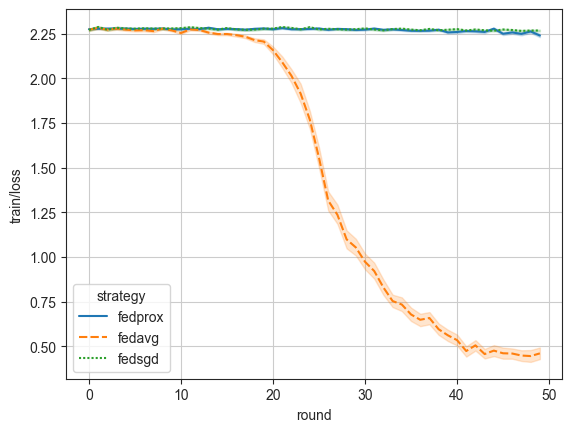

In [6]:
# sns.lineplot(df, x="train/time", y="train/loss", errorbar=None)
# plt.xlabel("Time", weight="bold")
# plt.ylabel("Training Loss", weight="bold")
# plt.show()

sns.lineplot(df, x="round", y="train/loss", hue="strategy", style="strategy")
# plt.xlabel("Round #", weight="bold")
# plt.ylabel("Training Loss", weight="bold")
plt.show()

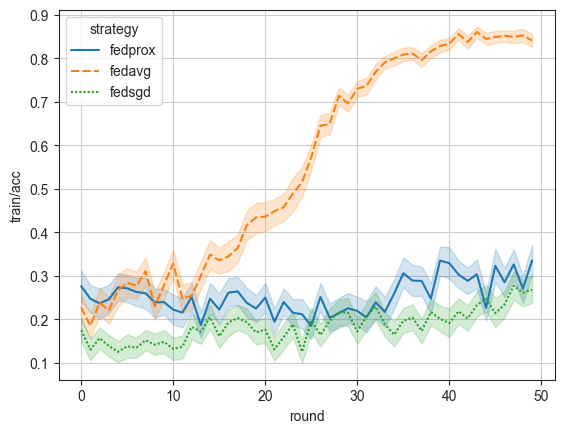

In [7]:
sns.lineplot(df, x="round", y="train/acc", hue="strategy", style="strategy")
# plt.xlabel("Round #", weight="bold")
# plt.ylabel("Training Loss", weight="bold")
plt.show()

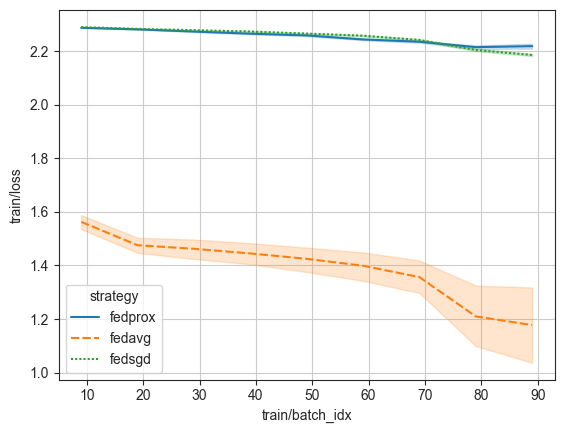

In [8]:
sns.lineplot(df, x="train/batch_idx", y="train/loss", hue="strategy", style="strategy")
# plt.xlabel("Round #", weight="bold")
# plt.ylabel("Training Loss", weight="bold")
plt.show()

In [9]:
df["train/time"].dtype

dtype('<M8[ns]')

In [10]:
hier_df = pd.read_feather("my_hier_results.feather")
hier_df.head()

,train/loss,train/epoch,train/batch_idx,train/time,node/idx,node/kind,parent/idx,parent/kind,round,train/rel_time,strategy
0,2.262590,0.0,9.0,2024-03-18 11:42:40.801114,6,worker,1,aggregator,0,3.190576,fedprox
1,2.250182,1.0,9.0,2024-03-18 11:42:41.302960,6,worker,1,aggregator,0,3.692422,fedprox
0,2.299859,0.0,9.0,2024-03-18 11:42:40.887281,7,worker,1,aggregator,0,3.276743,fedprox
1,2.305941,0.0,19.0,2024-03-18 11:42:41.299714,7,worker,1,aggregator,0,3.689176,fedprox
2,2.293489,1.0,9.0,2024-03-18 11:42:42.183764,7,worker,1,aggregator,0,4.573226,fedprox


In [11]:
print(hier_df["parent/idx"].unique())
print(hier_df["node/idx"].unique())

[1 2 3 4 5]
[ 6  7  8 12 13 15 17 18 21 25 28]


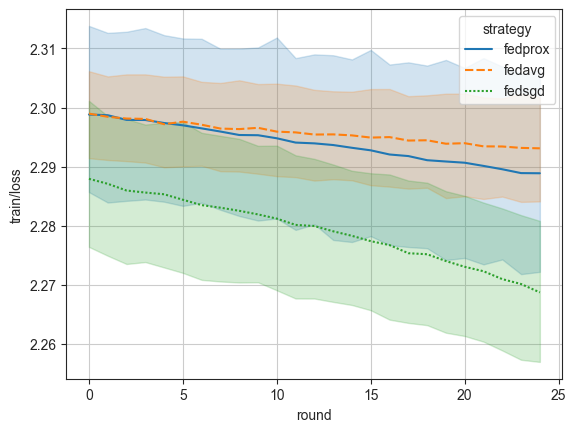

In [12]:
sns.lineplot(hier_df, x="round", y="train/loss", hue="strategy", style="strategy")
# plt.xlabel("Round #", weight="bold")
# plt.ylabel("Training Loss", weight="bold")
plt.show()